In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class NaiveBayes:
    def __init__(self):
        self.K = 0
        self.mu_hat = 0
        self.sigma = 0
        self.pi_hat = 0
    
    def fit(self, data, response):
        self.K = len(response.unique())
        self.mu_hat, self.sigma = np.empty((self.K, data.shape[1])), np.empty((self.K, data.shape[1]))
        self.pi_hat = np.empty(self.K)
        k_unique = response.unique()
        for k in range(self.K):
            self.mu_hat[k] = (np.mean(data[response == k_unique[k]]))
            self.sigma[k] = (np.std(data[response == k_unique[k]]))
            self.pi_hat[k] = len(data[response == k_unique[k]])/len(data)


    def predict(self, test):
        N_test = len(test)
        score = np.empty([N_test,self.K])
        prediction = np.empty(N_test)
        for i in range(self.K):
            score[:,i] = np.prod(np.exp(-(test - self.mu_hat[i])**2/(2*self.sigma[i]**2))/(np.sqrt(2*np.pi)*self.sigma[i]), axis =1)*self.pi_hat[i]

        for i in range(N_test):
            if np.argmax(score[i]) == 0:
                prediction[i] = 1
            else:
                prediction[i] = 0

        return prediction
    
    def predi_proba(self, test):
        N_test = len(test)
        score = np.empty([N_test,self.K])
        proba = np.empty([N_test,self.K])
        for i in range(self.K):
            score[:,i] = np.prod(np.exp(-(test - self.mu_hat[i])**2/(2*self.sigma[i]**2))/(np.sqrt(2*np.pi)*self.sigma[i]), axis =1)*self.pi_hat[i]
        
        #This will transform the score from the gaussian into the discriminant score for easier calculation of the probabilities
        score = np.log(score)

        for i in range(N_test):
            proba[i][0] = np.exp(score[i,1])/(np.exp(score[i,1]) + np.exp(score[i,0]))
            proba[i][1] = 1 - proba[i][0]
        
        return proba

In [3]:
df = pd.read_csv("SouthGermanCredit.asc", delimiter=" ")
X, y = df.iloc[:,0:2], df['kredit']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [4]:
model = NaiveBayes()
model.fit(X_train, y_train)

predict = model.predict(X_test)
proba = model.predi_proba(X_test)

/Users/giu/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/giu/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### SkLearn model

The same as I did with the OOP file, where I compared the LDA and QDA from sklearn to my own, I'll do the same with the Gaussian Naive Bayes

In [5]:
from sklearn.naive_bayes import GaussianNB
model_sk = GaussianNB()
model_sk.fit(X_train, y_train)

predict_sk = model_sk.predict(X_test)
proba_sk = model_sk.predict_proba(X_test)

In [6]:
from sklearn import metrics
print("The accuracy using my Gaussian Naive Bayes function is: ", metrics.accuracy_score(y_test, predict))
print("\nThe accuracy using the SKLearn GaussianNB function: ", metrics.accuracy_score(y_test, predict_sk))

The accuracy using my Gaussian Naive Bayes function is:  0.7212121212121212

The accuracy using the SKLearn GaussianNB function:  0.7212121212121212


/var/folders/2j/cgxlgwmd4pg23dn49wtq0lzw0000gn/T/ipykernel_70377/2668901734.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_home, tpr_home, 'b', color = 'green', label = 'ROC home')


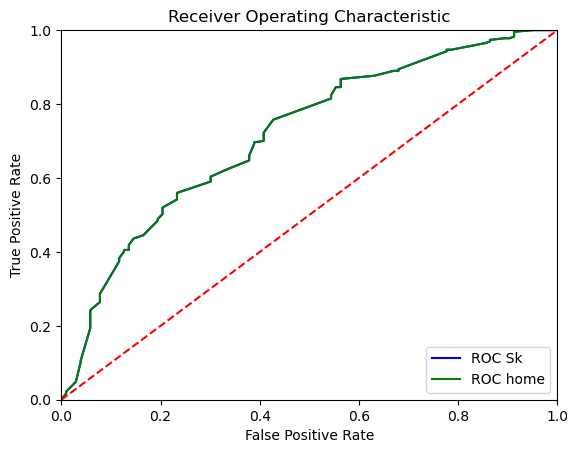

In [7]:
fpr_home, tpr_home, threshold = metrics.roc_curve(y_test, proba[:,1])

fpr, tpr, threshold = metrics.roc_curve(y_test, proba_sk[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC Sk')
plt.plot(fpr_home, tpr_home, 'b', color = 'green', label = 'ROC home')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()